In [15]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
# 导入数据
df = pd.read_csv('boston.csv')
data = df.values

In [17]:
# Normalization
def feature_normalize(X):
    mu = np.mean(X, axis = 0)  
    sigma = np.std(X, axis= 0, ddof = 1)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma
data, mu, sigma = feature_normalize(data)

In [18]:
# 增加偏置列
def add_bias(X):
    bias = np.ones(X.shape[0])
    bias = bias.reshape(X.shape[0],1)
    return np.hstack([bias, X])
X = data[:, 0:13]
y = data[:, 13:]
X = add_bias(X)

In [19]:
# 划分数据集
train_ind = int(len(X)*0.6)
X_train = X[:train_ind]
y_train = y[:train_ind]
X_test = X[train_ind:]
y_test = y[train_ind:]
print('shape of X:', X_train.shape, X_test.shape)
print('shape of y:', y_train.shape, y_test.shape)

shape of X: (303, 14) (203, 14)
shape of y: (303, 1) (203, 1)


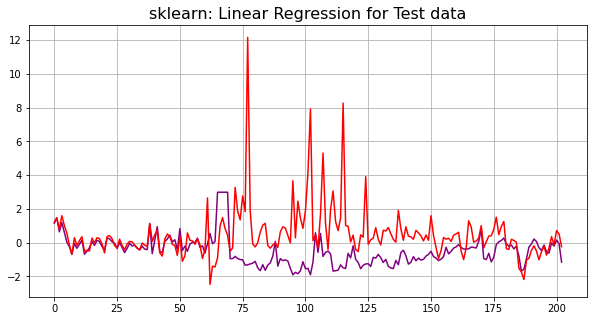

In [20]:
# 线性回归
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.title('sklearn: Linear Regression for Test data',fontsize=16)
plt.grid(True)
plt.plot(y_test , color='purple')
plt.plot(y_pred , color='red'  )
plt.show()

 


In [22]:
# 模型评估
print("MSE =",metrics.mean_squared_error(y_test,y_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2_train = ',lr.score(X_train,y_train))
print('R2_test = ',lr.score(X_test,y_test))

MSE = 4.359881454574564
RMSE = 2.0880329151080366
R2_train =  0.8745726072960811
R2_test =  -4.964241858632986
